<a href="https://colab.research.google.com/github/manika-lamba/SP26-LIS4_5693/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Data Visualization using Pandas, Altair, and Vega



## Background

In Python, there exists a few libraries specifically designed to work with text data.

NLTK https://www.nltk.org/

SPACY https://spacy.io/

SCIKIT-LEARN https://scikit-learn.org/stable/

Each of these libraries has its own history, and some of what they provide overlaps. Here's a helpful chart outlining some of their pros and cons.

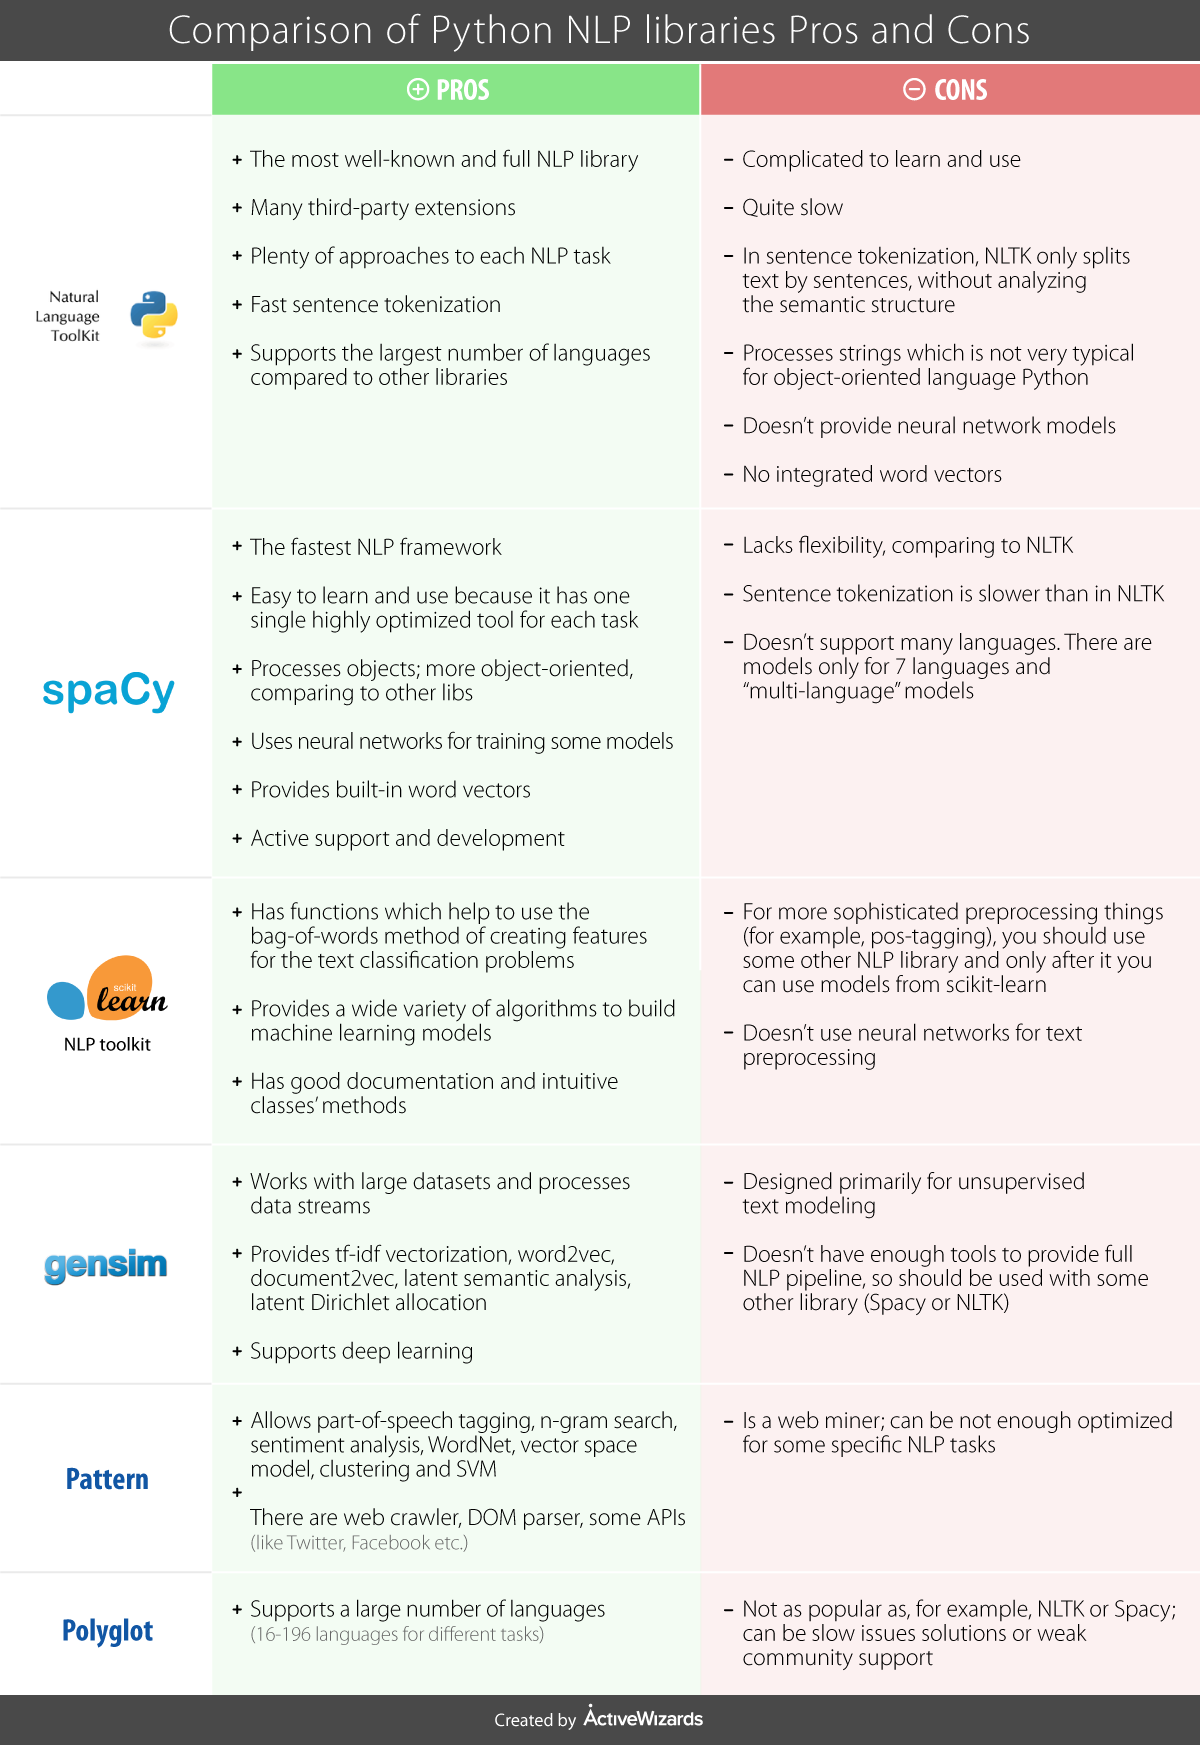

Ultimately, which library you choose to use depends on what you want to do with your data, but there's some general principles for text analysis that you should consider regardless of method.

**Word Counts and Zipf's Law**

The library NLTK has a helpful built in Class called `FreqDist` that takes a list of words and outputs their frequency in a corpus http://www.nltk.org/api/nltk.html?highlight=freqdist

Zipf’s law: Most common word is twice as common as the second most common word, three times as common as the third most common word, four times as common as the fourth most common word, and so forth.

It is named after the linguist George Zipf, who first found the phenomenon while laboriously counting occurrences of individual words in Joyce’s Ulysses in 1935.

This is a core textual phenomenon, and one you must constantly keep in mind: common words are very common indeed, and logarithmic scales are more often appropriate for plotting than linear ones. This pattern results from many dynamic systems where the “rich get richer,” which characterizes all sorts of systems in the humanities.

https://tedunderwood.com/2013/02/20/wordcounts-are-amazing/

## Introduction

In this lab, we will be working through the basics of Altair, a declarative visualization library in Python, and also be using Pandas for data manipulation.


## Learning Objectives

*   Idenitfy and understand different mark types in Altair
*   Distinguish between different data types and how they influence visualization
*   Visualize text data using different chart types
*   Add and customize interactivity in Altair visualizations




### Installing Libraries

In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data as vega_data

We are going to use the Seattle Library Circulation data from [City of Seattle](http://www.seattle.gov/tech/initiatives/open-data/about-the-open-data-program). This data contains the circulation data about the Seattle Public Library system from 2005 until 2021.

Let's load in the Seattle Circulation data from the GitHub.

In [2]:
import requests
import io

url = "https://raw.githubusercontent.com/manika-lamba/SP26-LIS4_5693/refs/heads/main/lab-assignments/lab-3/Seattle-Library_2015-2021.csv"
response = requests.get(url)
response.raise_for_status() # Raise an exception for HTTP errors
text = response.text

Let's save it as a DataFrame using `df` variable that holds pandas DataFrame and see how it looks!

In [3]:
seattle_df = pd.read_csv(io.StringIO(text))
seattle_df.head()

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, To...",Physical,Horizon
1,"My brilliant friend : childhood, adolescence /...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spygl...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, ...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive


Let's make make bar graph to count the occurrences of each material type in the Seattle Library data and then visualizes these counts as a bar chart. Let's breakdown this line of code to better understand it:

- `seattle_df['MaterialType']` selects the column named 'MaterialType' from the `seattle_df` DataFrame. This column likely contains categories describing the type of material (e.g., 'BOOK', 'VIDEODISC', 'EBOOK').

- `.value_counts()` is a pandas method applied to the selected 'MaterialType' column. It counts how many times each unique value appears in that column. For example, it would tell you how many 'BOOK' entries there are, how many 'VIDEODISC' entries, and so on. The result is a new pandas Series where the index is the unique material type and the values are their counts.

- `.plot(kind='bar')` is a convenient plotting method available directly on pandas Series and DataFrames. By specifying kind='bar', it tells pandas to generate a bar chart. The material types (from `value_counts()` index) will typically appear on the x-axis, and their corresponding counts will be represented by the height of the bars on the y-axis.

<Axes: xlabel='MaterialType'>

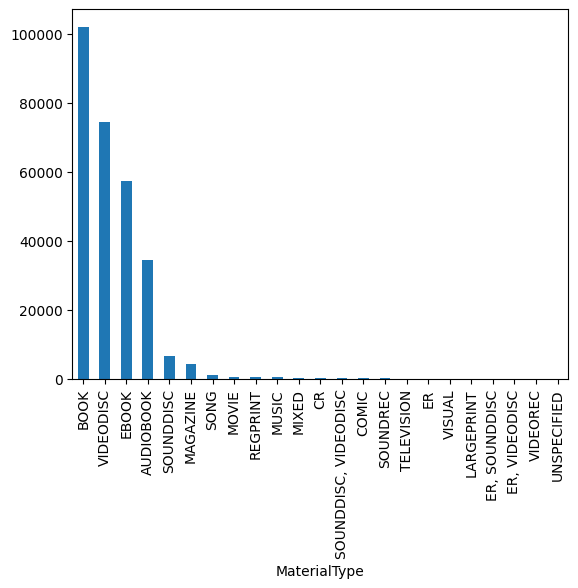

In [4]:
seattle_df['MaterialType'].value_counts().plot(kind='bar')

Worth noting that this is a perfectly great graph using the Pandas library, and it does not use the Altair package. You can read more about how Pandas creates plots here: [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) and for reference Pandas uses Matplotlib - remember spectrum of tools!.

But let's also think what we want to visualize that is missing in this graph.

So first thing is identify the type of chart (helpfully included with `kind='bar'`) and then look at how Altair creates bar charts. If you go to Altair's example gallery [https://altair-viz.github.io/gallery/index.html](https://altair-viz.github.io/gallery/index.html), you'll see that the first example is a simple bar chart https://altair-viz.github.io/gallery/simple_bar_chart.html and I've copied the code below.

In [5]:
source = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)


alt.Chart(...)

*So let's breakdown what we're doing here*

First we are specifying a new `Chart` class. In Altair, there are a number of Chart types that we'll delve into later but it essentially is the basic class we'll be working with.

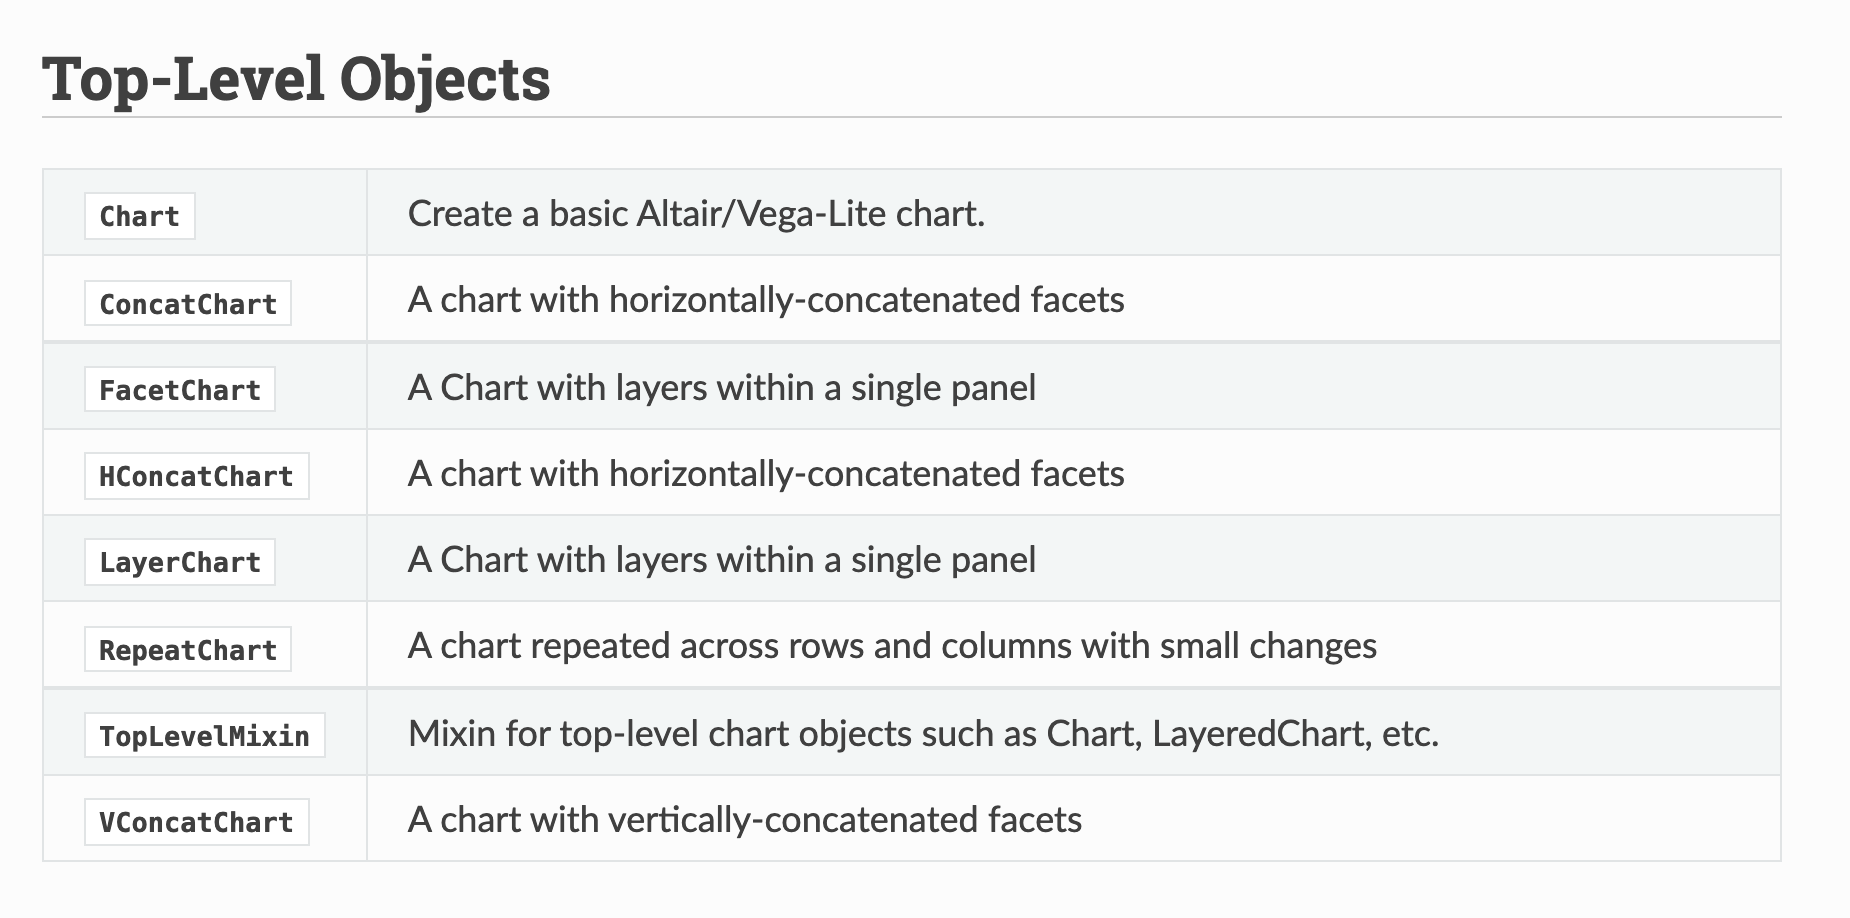

We pass our data to the `Chart` and then specify the type of `mark` we are using (in our case we are using `mark_bar()` to make bars). In Altair, we can use all types of marks to represent our data [https://altair-viz.github.io/user_guide/marks.html](https://altair-viz.github.io/user_guide/marks.html).

![marks](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1587438135/mark_properties_qyymyh.png)

Finally we are using something called encoding to tell Altair what variables we want to represent on the `x` and `y` axis. Altair has many fields for encoding [https://altair-viz.github.io/user_guide/encoding.html](https://altair-viz.github.io/user_guide/encoding.html) that we'll explore over this week.

Coming back to our `seattle_df['Materialtyoe'].valye_counts().plot(kind='bar')` code. The column `MaterialType` contains a list of categories, and then we grahed its values. If we understand what's being graphed, then the next step is to look at how the data is formatted, so let's explore the output of `value_counts` (for reference here is the documentation in the Pandas API [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)).

In [6]:
seattle_df['MaterialType'].value_counts()

,count
MaterialType,
BOOK,102076
VIDEODISC,74473
EBOOK,57299
AUDIOBOOK,34542
SOUNDDISC,6593
MAGAZINE,4197
SONG,975
MOVIE,596
REGPRINT,447


Seems like `value_counts` is literally doing what it says - counting values of each type. How else might we do this in Pandas?? And can we pass this data to Altair's `Chart` class?

Now, let's try and experiment with some alternates to `value_counts`. But first we need to tell Altair what type of mark we want in this case `mark_bar` and `value_counts` only returns a Series, whereas Altair expects a dataframe (it does accept lots of other data types, which you can read about here https://altair-viz.github.io/user_guide/data.html.

In [7]:
type(seattle_df['MaterialType'].value_counts())

pandas.core.series.Series

So how can we turn value_counts into a dataframe again? Let's look below!

In [8]:
seattle_df['MaterialType'].value_counts().rename_axis('MaterialType').reset_index(name='counts')

,MaterialType,counts
0,BOOK,102076
1,VIDEODISC,74473
2,EBOOK,57299
3,AUDIOBOOK,34542
4,SOUNDDISC,6593
5,MAGAZINE,4197
6,SONG,975
7,MOVIE,596
8,REGPRINT,447
9,MUSIC,382


So we now have this data in a dataframe that can be passed to Altair so let's try it out!

In [9]:
source = seattle_df['MaterialType'].value_counts().rename_axis('MaterialType').reset_index(name='counts')
alt.Chart(source).mark_bar().encode(
    x='MaterialType',
    y='counts'
)

alt.Chart(...)

So we've made a chart, tada 🎉! Easy right?! Except it's only sort of identical to what we had before with Pandas `plot()`

Well first let's make it actually identical by sorting the `x` axis (here's a helpful example [https://altair-viz.github.io/gallery/bar_chart_sorted.html](https://altair-viz.github.io/gallery/bar_chart_sorted.html) with the code posted below 👇🏽)

In [10]:
source = seattle_df['MaterialType'].value_counts().rename_axis('MaterialType').reset_index(name='counts')
alt.Chart(source).mark_bar().encode(
    x=alt.X('MaterialType', sort='-y'),
    y='counts'
)

alt.Chart(...)

`sort` seems like some fancy footwork, so let's go into Altair's documentation to understand what is actually happening here [https://altair-viz.github.io/user_guide/encoding.html?highlight=sort](https://altair-viz.github.io/user_guide/encoding.html?highlight=sort) (which I've also copied below 👇🏽)

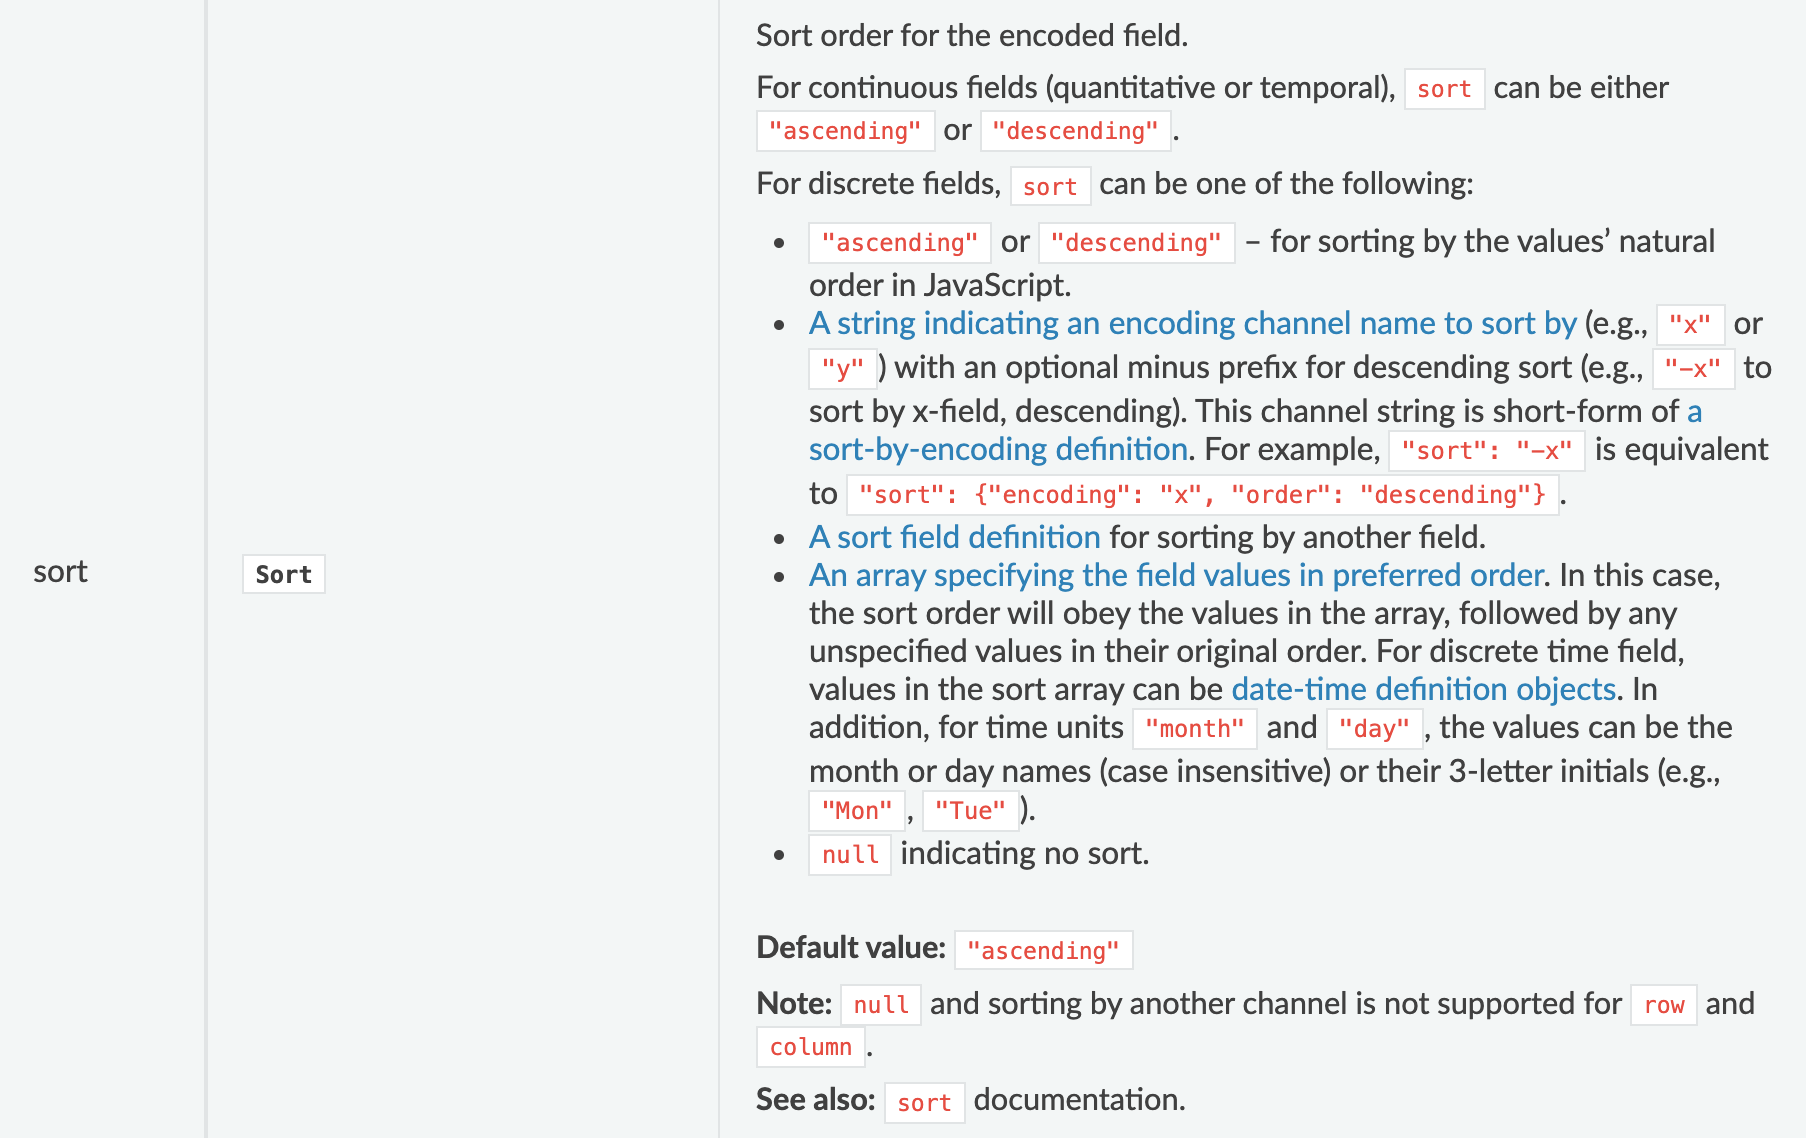

So, this documentation is telling us that sort (which is actually another Altair class [https://altair-viz.github.io/user_guide/generated/core/altair.Sort.html#altair.Sort](https://altair-viz.github.io/user_guide/generated/core/altair.Sort.html#altair.Sort)) can be used on any encoded field. So what's an encoded field?

Well, Altair has the following documentation https://altair-viz.github.io/user_guide/encoding.html

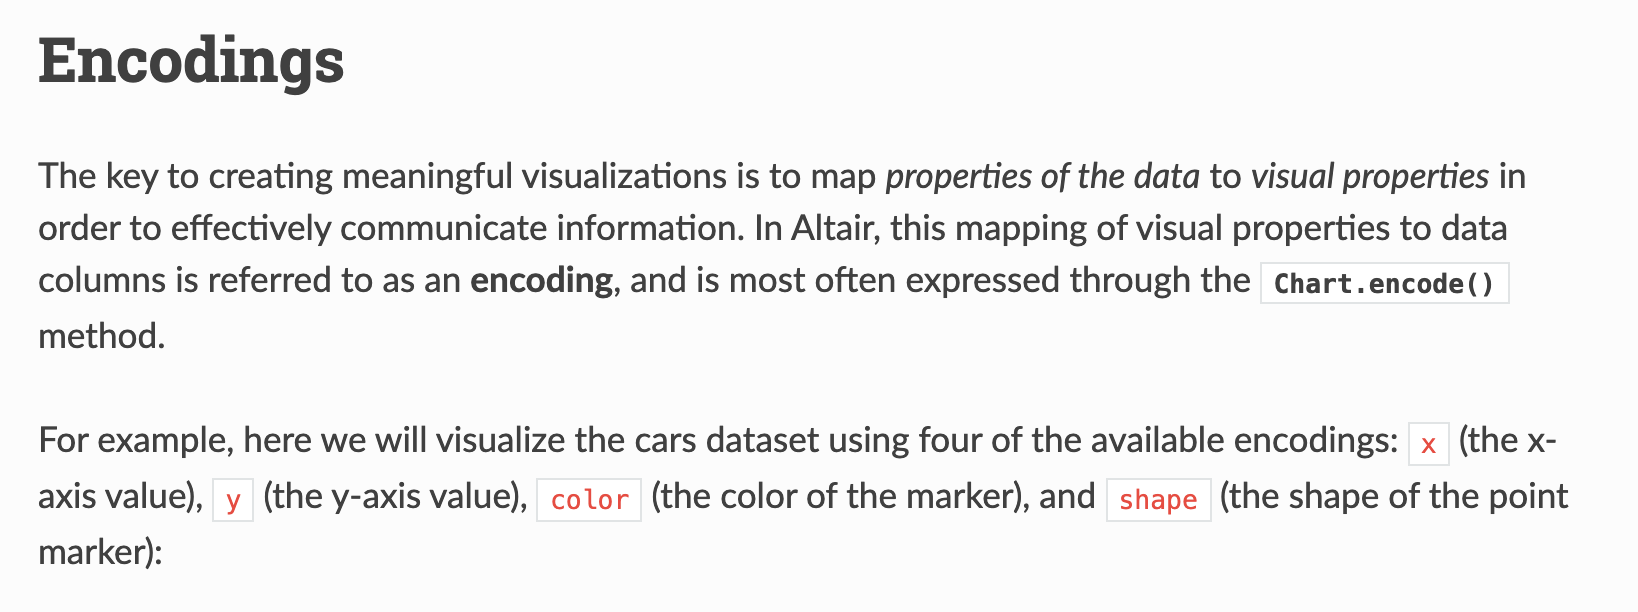

This is the graph it's referencing above ☝🏽

In [11]:
cars = vega_data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    shape='Origin'
)

alt.Chart(...)

So from this description we can start to understand that both `x` and `y` are encoded fields, as is `color` and `shape`.

Returning to the `sort` documentation it describes how you can use it with either `continuous` or `discrete` data. So what does that mean exactly?

![](https://lh3.googleusercontent.com/ouaZ3rY3a2NL356W3kDyYr5HTBFFMzSVK2QSQmptX4oMWmH5rmiBix3RIu-aZ9ptEZZUcKkDhN2A7BmPKgs_bCN6raFf5Car4CxHKsPqu_rmB5f-engm9BsHnTyR2rgLmxCSgq9s)

This graph outlines the main types of data you might encounter, which largely breaks down between qualitative (categorical) or quantitative (numerical). Discrete and continuous are both numerical but represent different types of numerical data.

Knowing your types of data is important not only for knowing how best to represent the data, but also because Altair often requires explicit data type included in your field, which you can see outlined here 👇🏽.

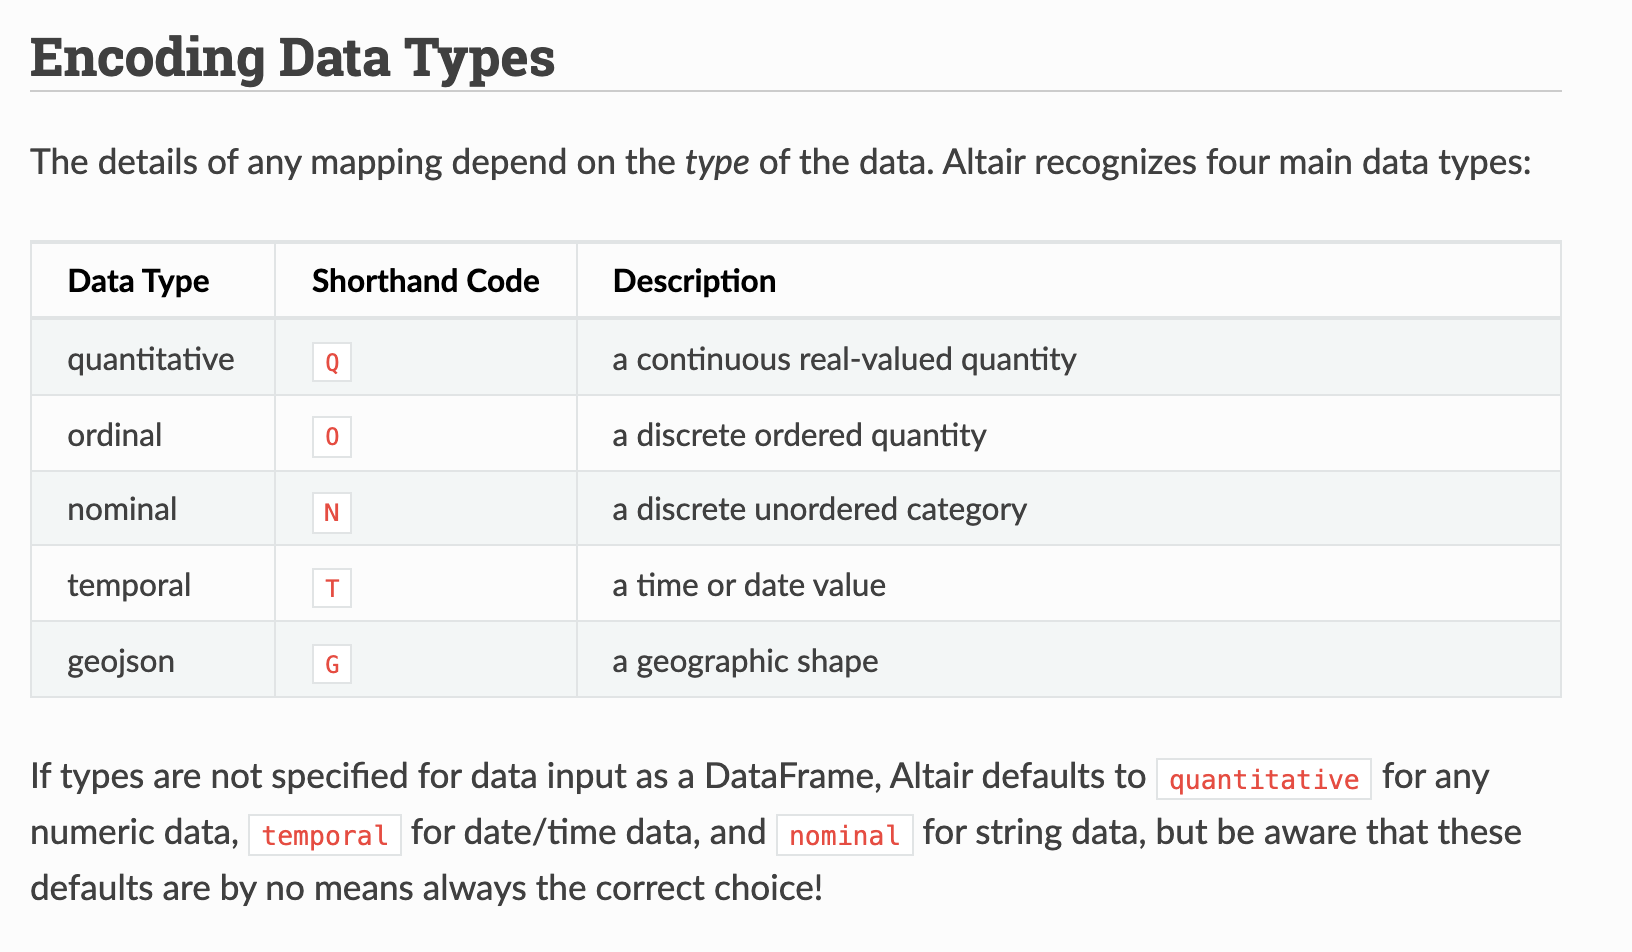

So, we can now understand that unless we specify explicitly Altair will assume our data is formatted certain ways, which will impact how the library graphs our data.

This was a lot of information about how Altair works but it's still probably all very overwhelming and abstract (not to scare you but this is some of the more readable visualization library documentation so do take the time to look through the examples and documentation!)

But we haven't quite achieved our goal. We've recreated the bar plot, but have not added anything additional yet.

So, what other information might be useful to include and how should we encode it? Let's take a look at `seattle_df` again.

In [12]:
seattle_df

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
0,Frog and toad all year / by Arnold Lobel.,"Lobel, Arnold",BOOK,34,2016,10,"Harper & Row,",c1976.,"Friendship Fiction, Frogs Juvenile fiction, To...",Physical,Horizon
1,"My brilliant friend : childhood, adolescence /...","Ferrante, Elena",BOOK,110,2016,10,"Europa Editions,",2012,"Friendship Fiction, Naples Italy Fiction",Physical,Horizon
2,Star trek [videorecording] / Paramount ; Spygl...,NaN,VIDEODISC,36,2016,10,"Paramount Home Entertainment,",c2009.,"Kirk James T 2233 2371 Drama, Spock Mr Drama, ...",Physical,Horizon
3,The Man in the High Castle,Philip K. Dick,EBOOK,63,2016,10,Houghton Mifflin Harcourt Trade and Reference,2012,"Fiction, Science Fiction",Digital,OverDrive
4,"The Fifth Season: Broken Earth Series, Book 1",N. K. Jemisin,EBOOK,44,2016,10,"Hachette Digital, Inc.",2015,"Fantasy, Fiction, Thriller",Digital,OverDrive
...,...,...,...,...,...,...,...,...,...,...,...
282282,The Fire Next Time,James Baldwin,EBOOK,23,2021,5,"Random House, Inc.",2013,"Sociology, African American Nonfiction, Nonfic...",Digital,OverDrive
282283,"Girl, woman, other / Bernardine Evaristo.","Evaristo, Bernardine, 1959-",BOOK,22,2021,5,"Black Cat, an imprint of Grove Atlantic,",[2019],"Women Black Great Britain Fiction, Great Brita...",Physical,Horizon
282284,Your Money or Your Life: 9 Steps to Transformi...,Vicki Robin,AUDIOBOOK,30,2021,5,Books on Tape,2018,"Business, Finance, Self-Improvement, Nonfiction",Digital,OverDrive
282285,Harry Potter and the Order of the Phoenix: Har...,J. K. Rowling,EBOOK,32,2021,5,Pottermore,2012,"Juvenile Fiction, Juvenile Literature",Digital,OverDrive


We currently have a bar chart that has `x` and `y` fields encoded already, so that leaves us with `shape` and `color` for now at least. Let's focus on `color`, which field might provide additional useful information? Also do we need to remake our `seattle_material_counts` variable or can we use built in Altair functionality to count `MaterialType` (*cough cough* we can! https://altair-viz.github.io/user_guide/encoding.html#encoding-channel-options)?

In [13]:
alt.Chart(seattle_df).mark_bar().encode(
     x=alt.X('MaterialType', sort='-y'),
     y='count()',
     color='CheckoutYear:N'
 )

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.Chart(...)

We've gotten our first error 🥳!! Well done!! I always try to celebrate whoever gets the first Python recursion error but this is pretty close! Let's look at the error:
`The number of rows in your dataset is greater than the maximum allowed (5000)`
To keep us from making very large graphs that eat up memory, Altair has a built-in limit in how many rows we can visualize as a default. You can read more about the default rationale here in the FAQ https://altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets but we can essentially disable that error by running this code `alt.data_transformers.disable_max_rows()`.

Coming back to our earlier discussion of data visualization tools, it's worth noting that there are pretty significant limitations on how much data you can visualize in the browser, which is why Altair has this limit. If you have very VERY large datasets you will likely either need some type of Java GUI (like Gephi) or use a Javascript library optimized for large data (likely something that uses WebGL or Canvas).

In [14]:
seattle_material_grouped = seattle_df.groupby(['MaterialType', 'CheckoutYear']).size().reset_index(name='counts')
alt.Chart(seattle_material_grouped).mark_bar().encode(
    x=alt.X('MaterialType', sort='-y'),
    y='counts',
    color='CheckoutYear:N'
)

alt.Chart(...)

We have finally added additional information that would be tricky to do in just Pandas. So, final thing to do is save it.

Well luckily Altair has lots of built-in ways to save graphs! You've probably been wondering what the circle is with the three dots and if you haven't clicked it yet, it actually let's us download our charts with a few different options.

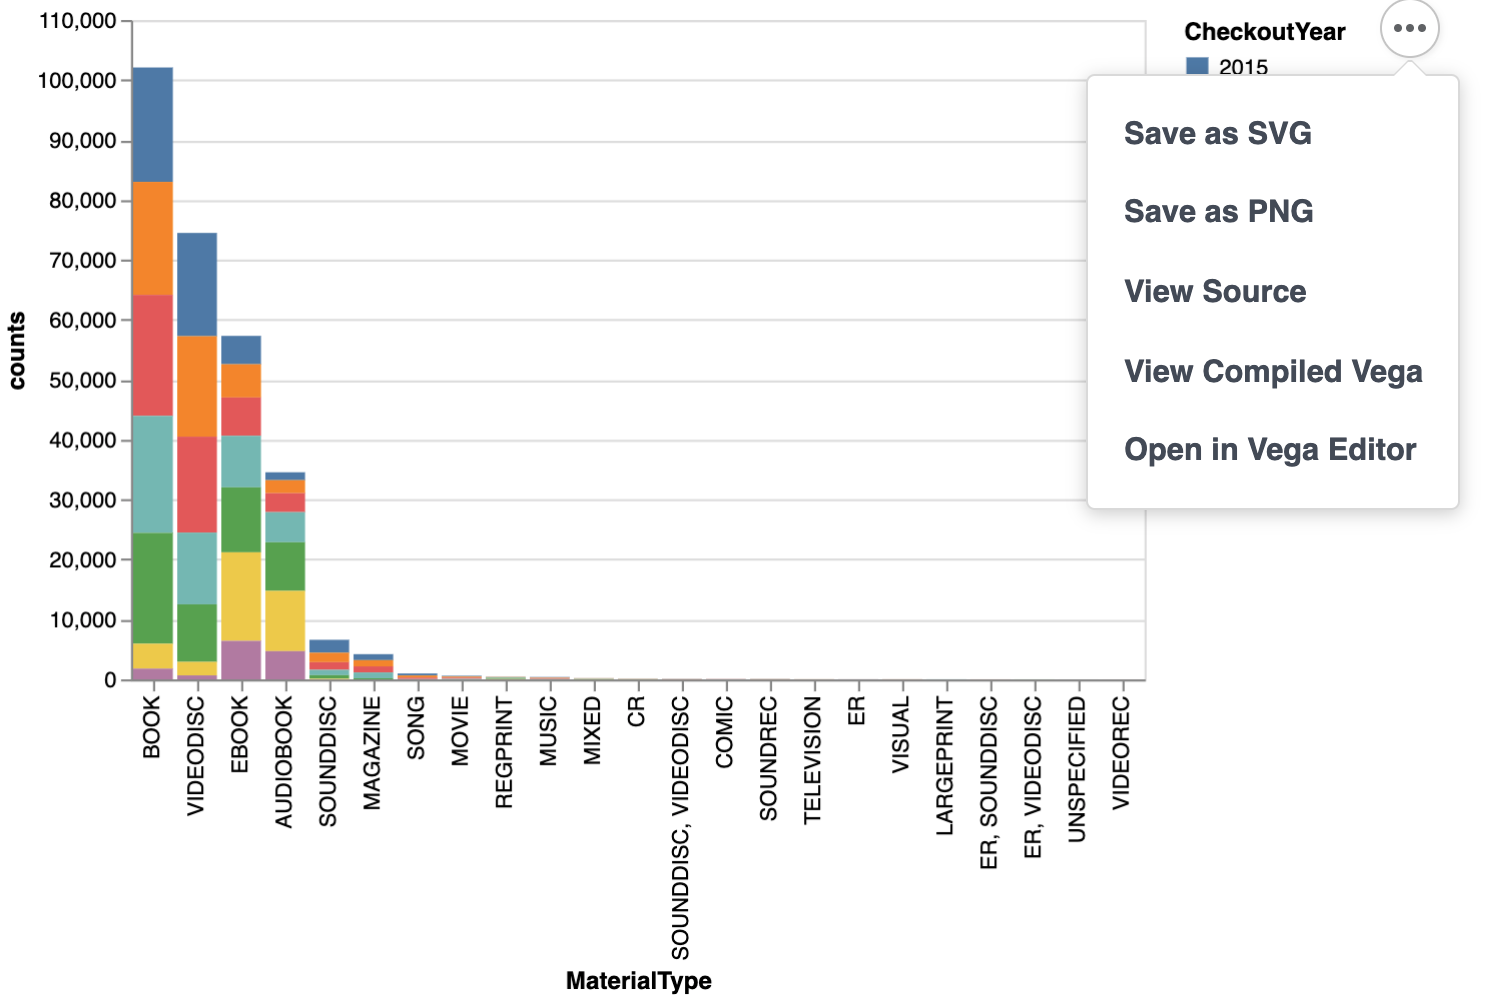

While png and svg are fairly straightforward, we can also see `Source` and `Compiled Vega` (which in this case are essentially the same), as well as `Open in Vega Editor`. Let's click on that final option and see what happens 👀

Woah! Where did we go??? To Javascript land!

Altair is actually a wrapper around a Javascript library, Vega-Lite, which itself is a wrapper around another library called Vega. If you have heard of D3.js, then Vega is an alternative library for making a visualization grammar. If you are curious about Vega, you can look at their simple bar chart tutorial to compare to the bar chart we created https://vega.github.io/vega/tutorials/bar-chart/.

The biggest benefit of Altair being a wrapper is that you can download the compiled vega and drop it into any html file to publish your graph to the web (more info on that is available here https://vega.github.io/vega-lite/tutorials/getting_started.html#embed). This is super exciting because D3 has a very steep learning curve, and other visualization libraries like ggplot2 are not great for embedding interactive versions.

And it's interactivity where Altair shines so let's add some to our bar chart!

The simplest way to add interactivity in Altair is with tooltips, that appear when you **hover** on the graph. Let's follow this example to add some to our graph https://altair-viz.github.io/gallery/scatter_tooltips.html

In [15]:
alt.Chart(seattle_material_grouped).mark_bar().encode(
    x=alt.X('MaterialType', sort='-y'),
    y='counts',
    color='CheckoutYear:N',
    tooltip=['MaterialType', 'counts', 'CheckoutYear']
).interactive()

alt.Chart(...)

We can also do more complex interactions, like those outlined here https://altair-viz.github.io/user_guide/interactions.html. Let's try and have some click actions as well by following this example https://altair-viz.github.io/gallery/interactive_legend.html.

*Click on the legend (CheckoutYear) to select a particular year and see the graph change!*

In [16]:
selection = alt.selection_point(fields=['CheckoutYear'], bind='legend')
alt.Chart(seattle_material_grouped).mark_bar().encode(
    x=alt.X('MaterialType', sort='-y'),
    y='counts',
    color=alt.Color('CheckoutYear:N', sort=alt.EncodingSortField('CheckoutYear', order='descending')),
    tooltip=['MaterialType', 'counts', 'CheckoutYear'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
    order='CheckoutYear'
).add_params(
    selection
)

alt.Chart(...)

### EXERCISE

Open a new Google Colab notebook and complete the tasks below. As you work, add brief explanations using the **Text (Markdown) cells** throughout your notebook to describe what you are doing.

1. Make a new folder named `lab-3` in your `lis4693` or `lis5693` repo on GitHub. **[0.5 Point]**

2. Complete the following tasks:

**TASK 1**: Using the same 'Seattle Library Data', visualize at least **two different column** from the seattle_df dataframe. **[4 Points]**

**TASK 2**: Use a different type of Altair mark for each visualization.

Anything but vertical bar graph is allowed, so you have points, lines, area, etc... need inspiration check out the example gallery: https://altair-viz.github.io/gallery/index.html **[2 Points]**

**TASK 3**: Add interactivity to your graph (panning, zooming, tooltips, selections, binding, etc.) **[3 Points]**

**TASK 4**: Follow the example code (https://altair-viz.github.io/altair-tutorial/notebooks/04-Compound-charts.html) to do horizontal concatenation of both your visualization side-by-side **[2 Points]**

**TASK 5**: At the end of your Colab notebook, create a new text cell and write a brief reflection for this assignment in a few sentences addressing the following **[2 Points]**:
  - What went well?
  - What did not go well or what challenges you encountered?

3. Push your Google Colab file to your `lab-3` GitHub repo from Colab. *No points will be given if you upload it to GitHub directly!* **[1 Point]**

4. Share the link to your `lab-3` GitHub repo for this lab assignment on CANVAS for credit. **[0.5 Point]**